In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e14/train.csv")

# Overview

In [3]:
df.shape

(15289, 18)

In [4]:
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
df.tail()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347
15288,15288,25.0,0.50,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.492077,0.446576,35.094733,5867.99722


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
df.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [8]:
df.dtypes

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

# EDA

In [9]:
df.drop(["id"], axis = 1, inplace = True)

In [10]:
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963,-0.022517
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082,-0.021940
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360,-0.022319


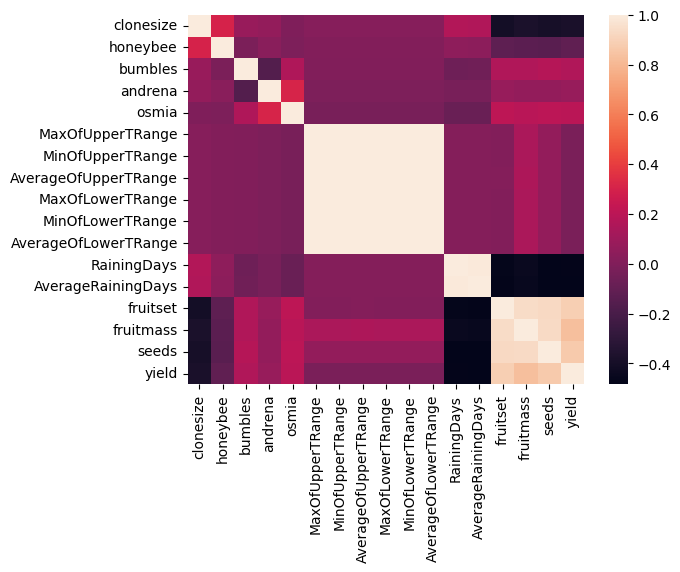

In [11]:
sns.heatmap(df.corr())
plt.show()

In [12]:
df.corr()["yield"].sort_values(ascending = False)

yield                   1.000000
fruitset                0.885967
seeds                   0.868853
fruitmass               0.826481
osmia                   0.198264
bumbles                 0.161145
andrena                 0.073969
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
AverageOfLowerTRange   -0.022081
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
MaxOfUpperTRange       -0.022517
honeybee               -0.118001
clonesize              -0.382619
RainingDays            -0.477191
AverageRainingDays     -0.483870
Name: yield, dtype: float64

# Feature Engineering

# Model Selection

In [13]:
X = df.drop(["yield"], axis = 1)
y = df[["yield"]]

In [14]:
RS = 13
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = RS)

In [15]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [16]:
def scaling(feature):
    global X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit
    scaler.fit(X_train[feature].to_numpy().reshape(-1,1))
    X_train[feature] = scaler.transform(X_train[feature].to_numpy().reshape(-1,1))
    X_test[feature] = scaler.transform(X_test[feature].to_numpy().reshape(-1,1))

In [17]:
scale_needed_features = [
"MaxOfUpperTRange",
"MinOfUpperTRange",
"AverageOfUpperTRange",
"MaxOfLowerTRange",
"MinOfLowerTRange",
"AverageOfLowerTRange",
"RainingDays",
"seeds" ]

In [18]:
for feature in scale_needed_features:
    scaling(feature)

In [19]:
X_train.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
7049,25.0,0.25,0.25,0.25,0.25,0.654618,0.714286,0.658654,0.655556,0.655172,0.653061,0.69697,0.39,0.262140,0.320727,0.000000
5621,12.5,0.25,0.25,0.50,0.50,0.000000,0.170330,0.000000,0.000000,0.000000,0.000000,0.69697,0.39,0.520587,0.445383,0.537784
3287,12.5,0.25,0.38,0.50,0.75,0.000000,0.170330,0.000000,0.000000,0.000000,0.000000,0.00000,0.10,0.626775,0.513172,0.845429
2362,12.5,0.25,0.25,0.63,0.50,0.309237,0.428571,0.312500,0.311111,0.310345,0.312925,0.69697,0.39,0.587320,0.483788,0.798815
8506,12.5,0.25,0.25,0.63,0.50,0.654618,0.714286,0.658654,0.655556,0.655172,0.653061,1.00000,0.56,0.335927,0.377012,0.210221


# Evaluation

### RandomForestRegressor

In [26]:
rfr = RandomForestRegressor(random_state = RS)
rfr.fit(X_train,y_train)
rfr_prediction = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test,rfr_prediction)
print(f"Random Forest Regressor MAE: {mae_rfr}")

/tmp/ipykernel_34/704875025.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


Random Forest Regressor MAE: 359.4349569586756


In [27]:
rfr = RandomForestRegressor(random_state = RS, criterion = "absolute_error")
rfr.fit(X_train,y_train)
rfr_prediction = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test,rfr_prediction)
print(f"Random Forest Regressor MAE: {mae_rfr}")

/tmp/ipykernel_34/3458305932.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


KeyboardInterrupt: 

In [ ]:
parameters_rfr = {
    "n_estimators" : [100,300,500,1000],
    "max_features" : [0.2, 0.5, 0.8, 1],
    "max_depth" : [2,4,5]
    
}

### LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test,lr_prediction)
print(f"Linear Regression MAE: {mae_lr}")

Linear Regression MAE: 364.3618771667548


### XGBRegressor

In [23]:
xgb = XGBRegressor(random_state = RS)
xgb.fit(X_train,y_train)
xgb_prediction = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test,xgb_prediction)
print(f"XGBoost Regressor MAE: {mae_xgb}")

XGBoost Regressor MAE: 364.43054771680664


# Test

# Final Evaluation

# Result

In [ ]:
# Author: amyrmahdy
# Date: 12 May 2023